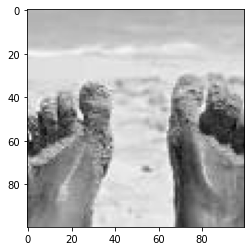

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "D:/Datasets/FeetOrHand"
CATEGORIES = ["Feet", "Hand"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show
        break
    break

<function matplotlib.pyplot.show(close=None, block=None)>

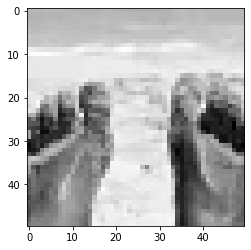

In [2]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show

In [3]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()
print(len(training_data))

2000


In [4]:
import random

random.shuffle(training_data)
X=[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [5]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

X = X/255.0

model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

y = np.array(y)

model.fit(X, y, batch_size=10, epochs=15, validation_split=0.2)

Epoch 1/15
160/160 [==============================] - 9s 56ms/step - loss: 0.6819 - accuracy: 0.5650 - val_loss: 0.6787 - val_accuracy: 0.5225
Epoch 2/15
160/160 [==============================] - 8s 53ms/step - loss: 0.6437 - accuracy: 0.5775 - val_loss: 0.6735 - val_accuracy: 0.5625
Epoch 3/15
160/160 [==============================] - 9s 54ms/step - loss: 0.6059 - accuracy: 0.6275 - val_loss: 0.6665 - val_accuracy: 0.5725
Epoch 4/15
160/160 [==============================] - 9s 54ms/step - loss: 0.5771 - accuracy: 0.6594 - val_loss: 0.6924 - val_accuracy: 0.5800
Epoch 5/15
160/160 [==============================] - 9s 53ms/step - loss: 0.5334 - accuracy: 0.7237 - val_loss: 0.6388 - val_accuracy: 0.6350
Epoch 6/15
160/160 [==============================] - 9s 53ms/step - loss: 0.4920 - accuracy: 0.7469 - val_loss: 0.7054 - val_accuracy: 0.7100
Epoch 7/15
160/160 [==============================] - 9s 54ms/step - loss: 0.4849 - accuracy: 0.7494 - val_loss: 0.7140 - val_accuracy: 0.6625